<a href="https://colab.research.google.com/github/Neo-glitch/t.f-2.0-practice/blob/master/AI_Celsius_to_Farenheit_converter(very_simple_neuron_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# import datasets

# mount my Gdrive
from google.colab import drive
drive.mount("/content/mount")

Drive already mounted at /content/mount; to attempt to forcibly remount, call drive.mount("/content/mount", force_remount=True).


In [ ]:
temp_df = pd.read_csv("/content/mount/MyDrive/datasets/Celsius+to+Fahrenheit.csv")

temp_df.head(4)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0


In [ ]:
# last rows
temp_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


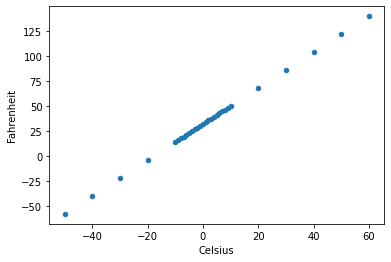

In [ ]:
temp_df.plot(x= "Celsius", y = "Fahrenheit", kind="scatter")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


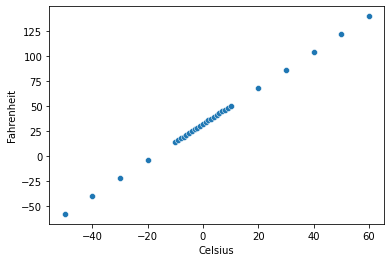

In [ ]:
# using seaborn to plot
sns.scatterplot(temp_df["Celsius"], temp_df["Fahrenheit"]);

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(temp_df["Celsius"], temp_df["Fahrenheit"], test_size = 0.05)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 1, input_shape = [1,], activation = "linear")
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.5), loss = "mean_squared_error")

history = model.fit(x_train, y_train, epochs = 200)

Epoch 1/200
1/1 [==============================] - 1s 653ms/step - loss: 2175.3333
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 1484.5397
Epoch 3/200
1/1 [==============================] - 0s 6ms/step - loss: 1073.6891
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 918.9923
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 950.3485
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 1052.6663
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 1120.1537
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 1108.9553
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 1030.0590
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 917.3500
Epoch 11/200
1/1 [==============================] - 0s 11ms/step - loss: 805.7036
Epoch 12/200
1/1 [==============================] - 0s 14ms/step - loss: 720.6304
Epoch 13/200
1/1 [=======

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 273ms/step - loss: 1.0662e-05


1.0661682608770207e-05

In [ ]:
x_test.shape

(2,)

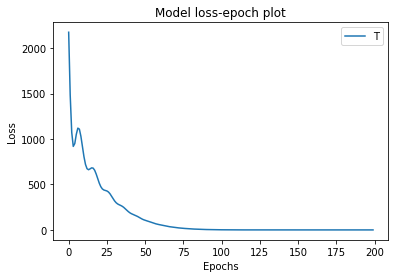

In [ ]:
# eval model, plot loss against epoch

plt.plot(history.history["loss"])
plt.title("Model loss-epoch plot")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend("Training loss")

In [ ]:
# get model wieghts and bias
model.get_weights()

[array([[1.7999483]], dtype=float32), array([32.0029], dtype=float32)]

In [ ]:
y_pred = model.predict([x_test.to_numpy()])
y_true = y_test.to_numpy()

print(f"y_test[0] is: {y_true[1]}")
print(f"y_pred is: {y_pred[1][0]}")

y_test[0] is: 24.8
y_pred is: 24.8031063079834
